# Prediction on MobileNetV2 model

## Import Required Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import random

## Configuration

In [5]:
# --- Configuration ---
MODEL_PATH = 'mobilenetv2_model.h5'
TEST_DIR = './test'
IMG_SIZE = (256, 256)
CLASS_LABELS = ['glioma', 'meningioma', 'notumor', 'pituitary']

## Load model

In [7]:
# --- Load the trained model ---
model = load_model(MODEL_PATH)

## Predict

In [9]:
# --- Predict ---
images = []
true_labels = []
predicted_labels = []
confidences = []
file_names = []

for class_name in CLASS_LABELS:
    class_dir = os.path.join(TEST_DIR, class_name)
    image_names = os.listdir(class_dir)

    if not image_names:
        print(f"No images found in {class_name}")
        continue

    random_image = random.choice(image_names)
    image_path = os.path.join(class_dir, random_image)

    # Load and preprocess
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class]

    # Store information
    images.append(img)
    true_labels.append(class_name)
    predicted_labels.append(CLASS_LABELS[predicted_class])
    confidences.append(confidence)
    file_names.append(random_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


## Result

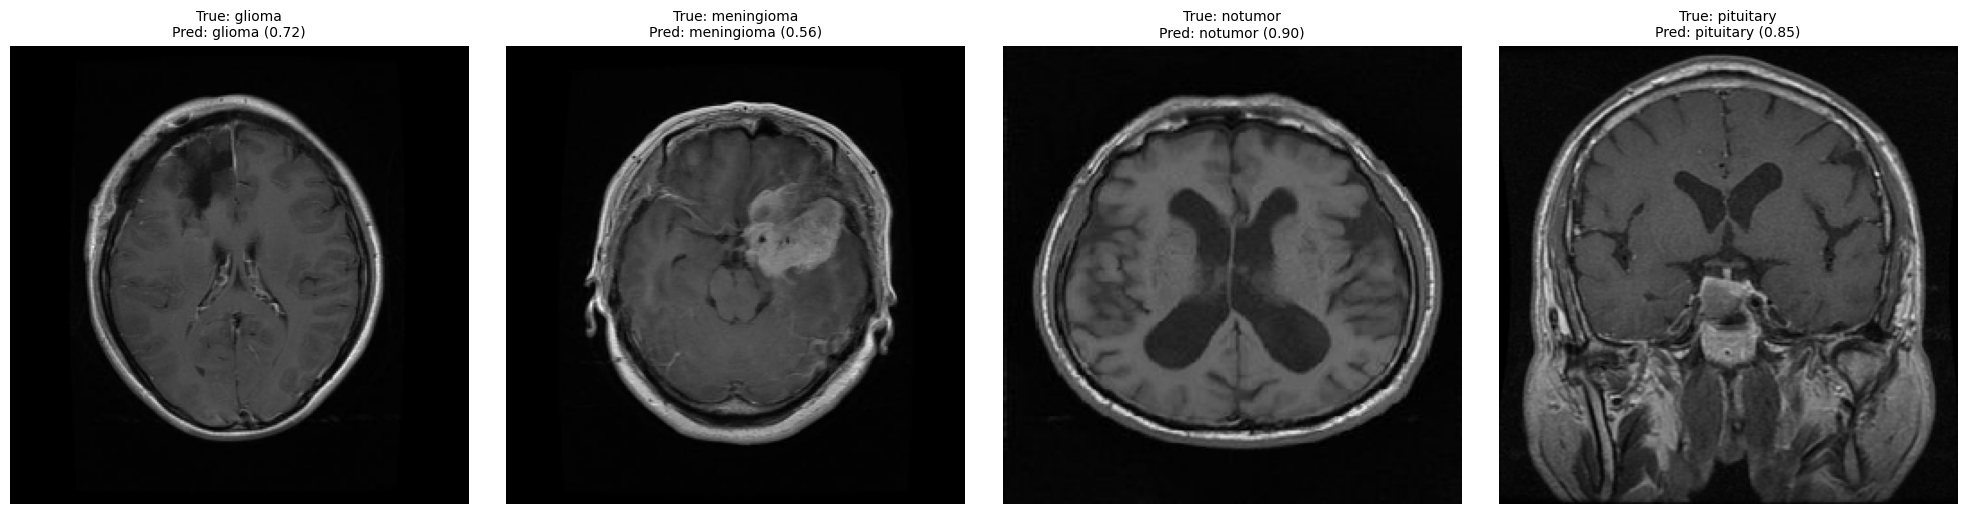

[1] Image: Tr-gl_0251.jpg
     True Label:      glioma
     Predicted Label: glioma
     Confidence:      0.72
--------------------------------------------------
[2] Image: Tr-me_0227.jpg
     True Label:      meningioma
     Predicted Label: meningioma
     Confidence:      0.56
--------------------------------------------------
[3] Image: Tr-no_0069.jpg
     True Label:      notumor
     Predicted Label: notumor
     Confidence:      0.90
--------------------------------------------------
[4] Image: Te-pi_0046.jpg
     True Label:      pituitary
     Predicted Label: pituitary
     Confidence:      0.85
--------------------------------------------------


In [11]:
# --- Display all in a single grid ---
num_images = len(images)
fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))

for i in range(num_images):
    axes[i].imshow(images[i])
    axes[i].set_title(
        f"True: {true_labels[i]}\nPred: {predicted_labels[i]} ({confidences[i]:.2f})",
        fontsize=10
    )
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# --- Print all info below the grid ---
for i in range(num_images):
    print(f"[{i+1}] Image: {file_names[i]}")
    print(f"     True Label:      {true_labels[i]}")
    print(f"     Predicted Label: {predicted_labels[i]}")
    print(f"     Confidence:      {confidences[i]:.2f}")
    print("-" * 50)